In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 경로
# quasar_file_path = './data/gaia_quasar_below_g_mag_17.csv'
# galaxy_file_path = './data/gaia_galaxy_below_g_mag_17.csv'
star_file_path = './data/gaia_star_below_g_mag_7.csv'
# star_file_path = './data/gaia_for_main_sequence_star.csv'


# CSV 파일을 읽어서 DataFrame으로 변환
# quasar_df = pd.read_csv(quasar_file_path)
# galaxy_df = pd.read_csv(galaxy_file_path)
star_df = pd.read_csv(star_file_path)

# 결측치가 있는 행 제거 (모든 열 기준)
'''
quasar_df_clean = quasar_df.dropna()
galaxy_df_clean = galaxy_df.dropna()
star_df_clean = star_df.dropna()
'''

# 일부 행 제거
# quasar_df_clean = quasar_df.drop(columns=['ra', 'dec', 'phot_g_mean_flux', 'phot_bp_mean_flux', 'phot_rp_mean_flux', 'phot_bp_rp_excess_factor', 'classprob_dsc_combmod_quasar', 'classprob_dsc_combmod_galaxy', 'classprob_dsc_combmod_star'])
# galaxy_df_clean = galaxy_df.drop(columns=['ra', 'dec', 'phot_g_mean_flux', 'phot_bp_mean_flux', 'phot_rp_mean_flux', 'phot_bp_rp_excess_factor', 'classprob_dsc_combmod_quasar', 'classprob_dsc_combmod_galaxy', 'classprob_dsc_combmod_star'])
star_df_clean = star_df.drop(columns=['ra', 'dec', 'phot_g_mean_flux', 'phot_bp_mean_flux', 'phot_rp_mean_flux', 'phot_bp_rp_excess_factor', 'classprob_dsc_combmod_quasar', 'classprob_dsc_combmod_galaxy', 'classprob_dsc_combmod_star'])

# 결측치 있는 데이터 제거
star_df_clean = star_df_clean.dropna()


# 데이터 값 변환------
# quasar_df_clean['mh_gspphot'] = 10 ** quasar_df_clean['mh_gspphot']
# galaxy_df_clean['mh_gspphot'] = 10 ** galaxy_df_clean['mh_gspphot']
star_df_clean['mh_gspphot'] = 10 ** star_df_clean['mh_gspphot']
star_df_clean['logg_gspphot'] = 10 ** star_df_clean['logg_gspphot']

#상대등급 -> 절대등급 = m−5log10(d/10) 
star_df_clean['phot_g_mean_mag'] = star_df_clean['phot_g_mean_mag'] - 5*np.log10(star_df_clean['distance_gspphot']/10)
star_df_clean['phot_bp_mean_mag'] = star_df_clean['phot_bp_mean_mag'] - 5*np.log10(star_df_clean['distance_gspphot']/10)
star_df_clean['phot_rp_mean_mag'] = star_df_clean['phot_rp_mean_mag'] - 5*np.log10(star_df_clean['distance_gspphot']/10)


#star_df_clean['phot_variable_flag'] = np.where(star_df_clean['phot_variable_flag'] == 'NOT_AVAILABLE', 0, 1)
#------------------


# 데이터 확인
# print('quasar',quasar_df_clean.shape)
# print('galaxy',galaxy_df_clean.shape)
print('star',star_df_clean.shape)


# 데이터 타입 확인
print(star_df_clean.dtypes)

print(star_df_clean.head())

star (7855, 12)
parallax              float64
phot_g_mean_mag       float64
phot_bp_mean_mag      float64
phot_rp_mean_mag      float64
radial_velocity       float64
phot_variable_flag     object
teff_gspphot          float64
logg_gspphot          float64
mh_gspphot            float64
distance_gspphot      float64
azero_gspphot         float64
ag_gspphot            float64
dtype: object
      parallax  phot_g_mean_mag  phot_bp_mean_mag  phot_rp_mean_mag  \
154  68.000999         2.273277          2.570572          2.062984   
201  23.145108         0.740800          0.907508          0.627752   
215   3.938725        -2.205916         -2.207610         -2.138021   
218  40.327901         1.333894          1.473822          1.212334   
239  43.746746         1.541001          1.701324          1.389635   

     radial_velocity phot_variable_flag  teff_gspphot  logg_gspphot  \
154        13.000446      NOT_AVAILABLE     7498.3286   8435.289651   
201        10.962601      NOT_AVAILABLE  

In [2]:
# 항성의 절대밝기 10등급 미만 5등급 이상으로 조정 했을때.(주계열성만 추출)
# star_df_clean = star_df_clean[(star_df_clean['phot_g_mean_mag'] >= 5) & (star_df_clean['phot_g_mean_mag'] < 10)]

#star_df_clean

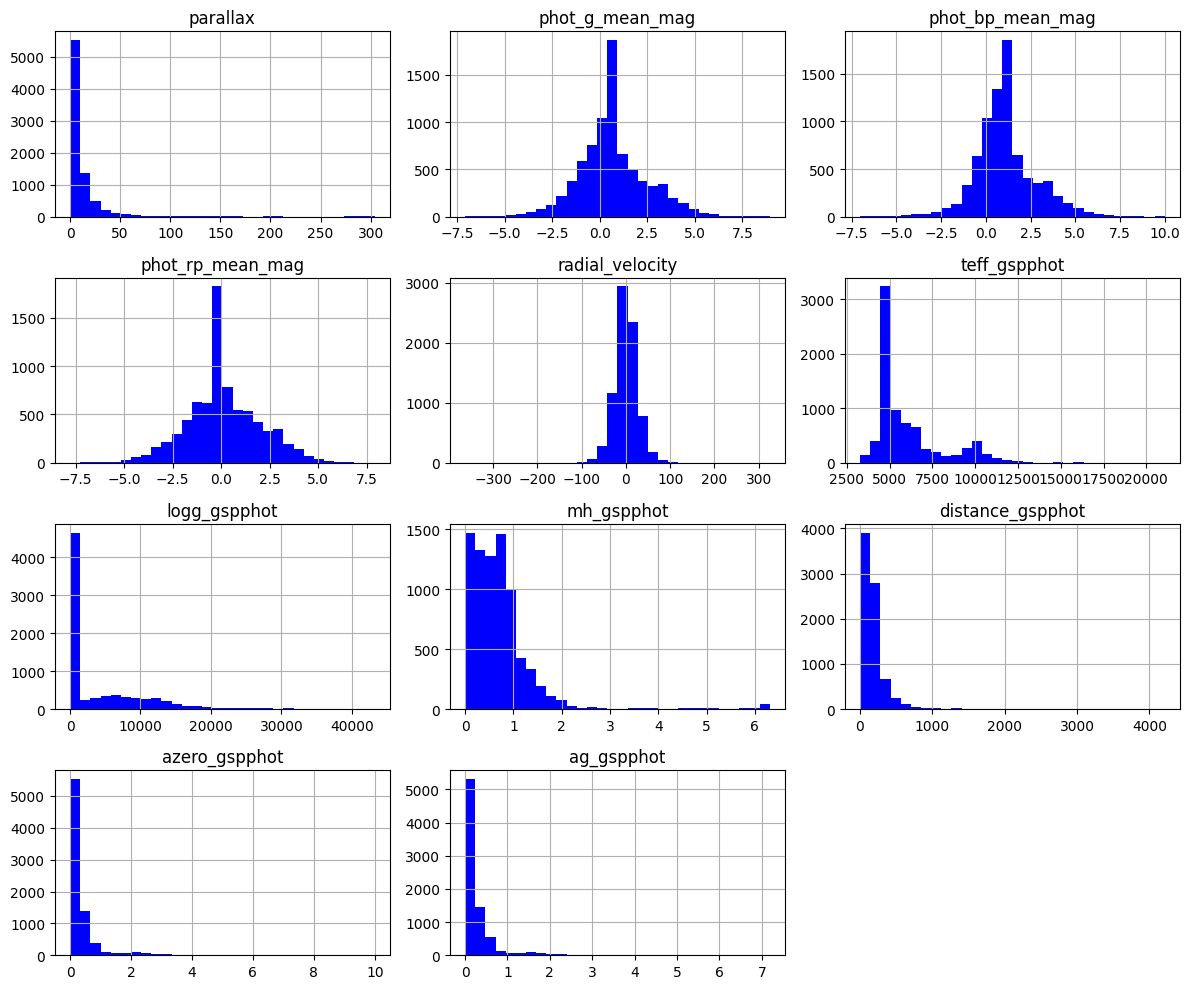

In [3]:
# 모든 수치형 컬럼에 대해 히스토그램 그리기
star_df_clean.hist(bins=30, figsize=(12, 10), color='blue')  # bins는 구간 수
plt.tight_layout()
plt.savefig('star original data')
plt.show()

In [4]:
# 원본 복사
star_df_clean_yeojohnson = star_df_clean[['radial_velocity','teff_gspphot']].copy()

#분포 변환
target_cols = ['parallax', 
               'phot_g_mean_mag',
               'phot_bp_mean_mag',
               'phot_rp_mean_mag',
               'logg_gspphot',
               'mh_gspphot',
               'distance_gspphot',
               'azero_gspphot',
               'ag_gspphot'
              ] 

# 분포변환 할 데이터 복사
star_df_clean_subset = star_df_clean[target_cols].copy()

# yeo-johnson 변환
pt = PowerTransformer(method='yeo-johnson')
transformed = pt.fit_transform(star_df_clean_subset)

# 결과를 DataFrame으로 변환
star_df_clean_transformed = pd.DataFrame(transformed, columns=[col for col in star_df_clean_subset.columns], index=star_df_clean_subset.index)

# 변환 결과를 원본 복사본에 추가
star_df_clean_yeojohnson = star_df_clean_yeojohnson.join(star_df_clean_transformed)


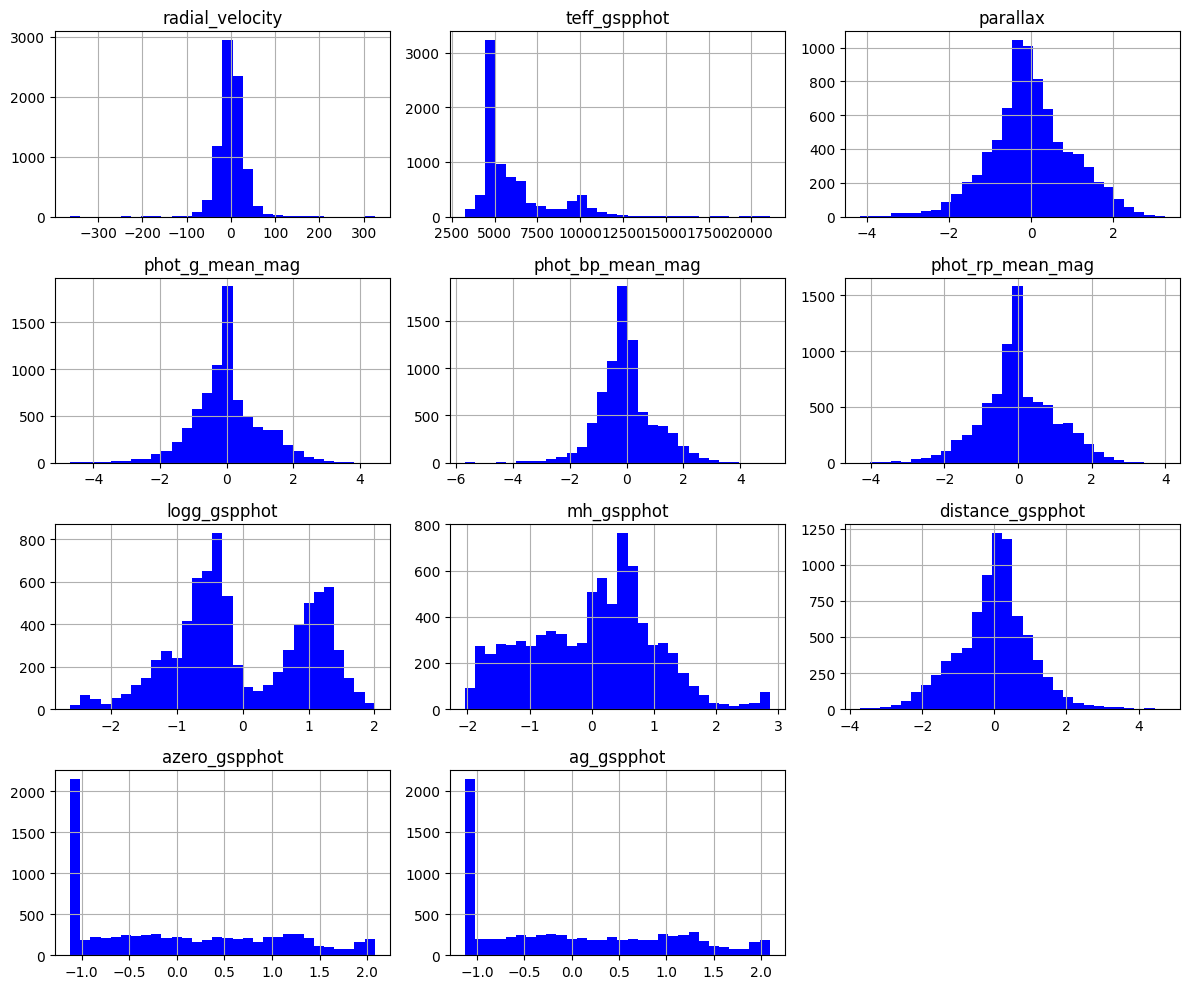

In [5]:
star_df_clean_yeojohnson.hist(bins=30, figsize=(12, 10), color='blue')  # bins는 구간 수
plt.tight_layout()
plt.savefig('star preprocessed data')
plt.show()

In [6]:
# 스케일링 대상 컬럼 구분
minmax_cols = ['parallax', 
               'phot_g_mean_mag',
               'phot_bp_mean_mag',
               'phot_rp_mean_mag',
               'teff_gspphot',
               'logg_gspphot',
               'mh_gspphot',
               'distance_gspphot',
               'azero_gspphot',
               'ag_gspphot'
              ] 

rv_scaler_minmax = MinMaxScaler(feature_range=(-1, 1))
scaler_minmax = MinMaxScaler()

scaled_rv_minmax = rv_scaler_minmax.fit_transform(star_df_clean['radial_velocity'].values.reshape(-1, 1))
scaled_minmax = scaler_minmax.fit_transform(star_df_clean[minmax_cols])

# DataFrame으로 변환
star_df_clean_rv_minmax = pd.DataFrame(scaled_rv_minmax, columns=['radial_velocity'])
star_df_clean_minmax = pd.DataFrame(scaled_minmax, columns=minmax_cols)

# only scaled data concat
star_df_clean_scaled = pd.concat([star_df_clean_rv_minmax, star_df_clean_minmax, ], axis=1)

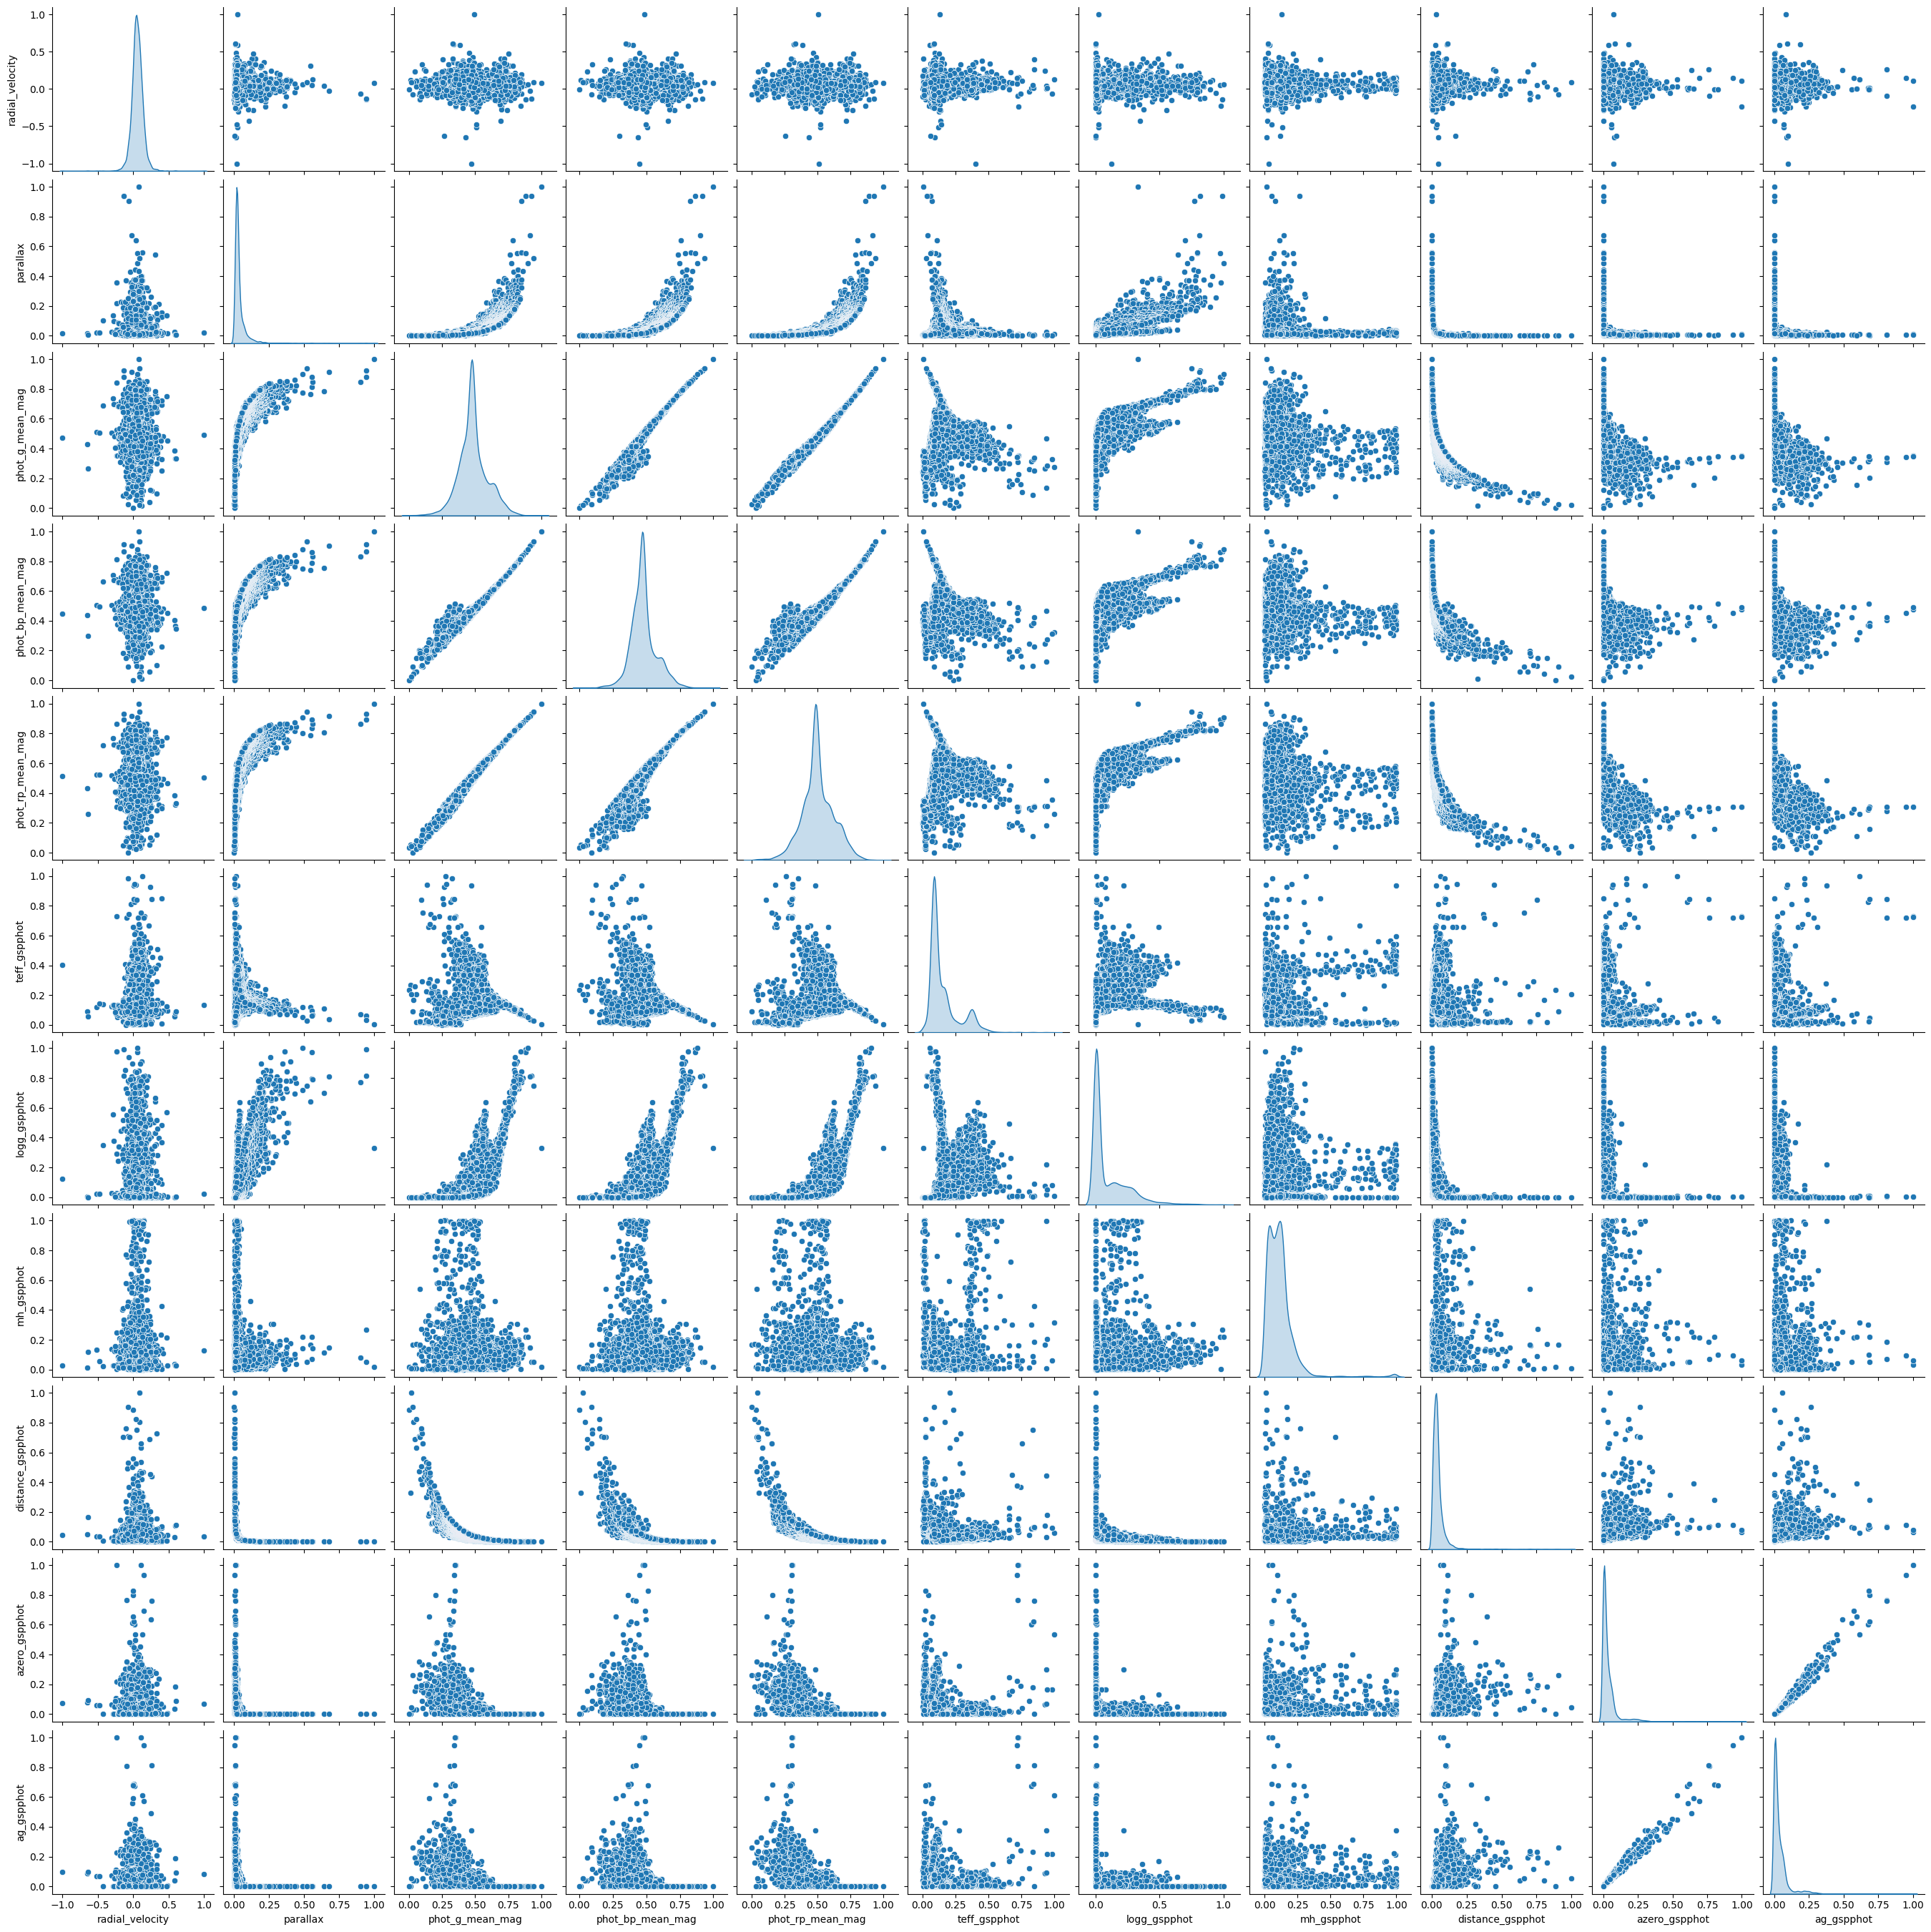

In [7]:
sns.pairplot(star_df_clean_scaled, diag_kind='kde')
plt.savefig('star original scatterplot matrix')
plt.show()

In [8]:
star_df_clean_scaled_yeojohnson = star_df_clean_yeojohnson[target_cols].copy()

rv_yj_scaler_minmax = MinMaxScaler(feature_range=(-1, 1))

scaled_rv_yj_minmax = pd.DataFrame(
    rv_yj_scaler_minmax.fit_transform(
        star_df_clean_yeojohnson[['radial_velocity','teff_gspphot']]
    ),
    columns=['radial_velocity','teff_gspphot'],
    index=star_df_clean_yeojohnson.index
)

# yeojohnson data concat
star_df_clean_yj_scaled = pd.concat([scaled_rv_yj_minmax, star_df_clean_scaled_yeojohnson], axis=1)

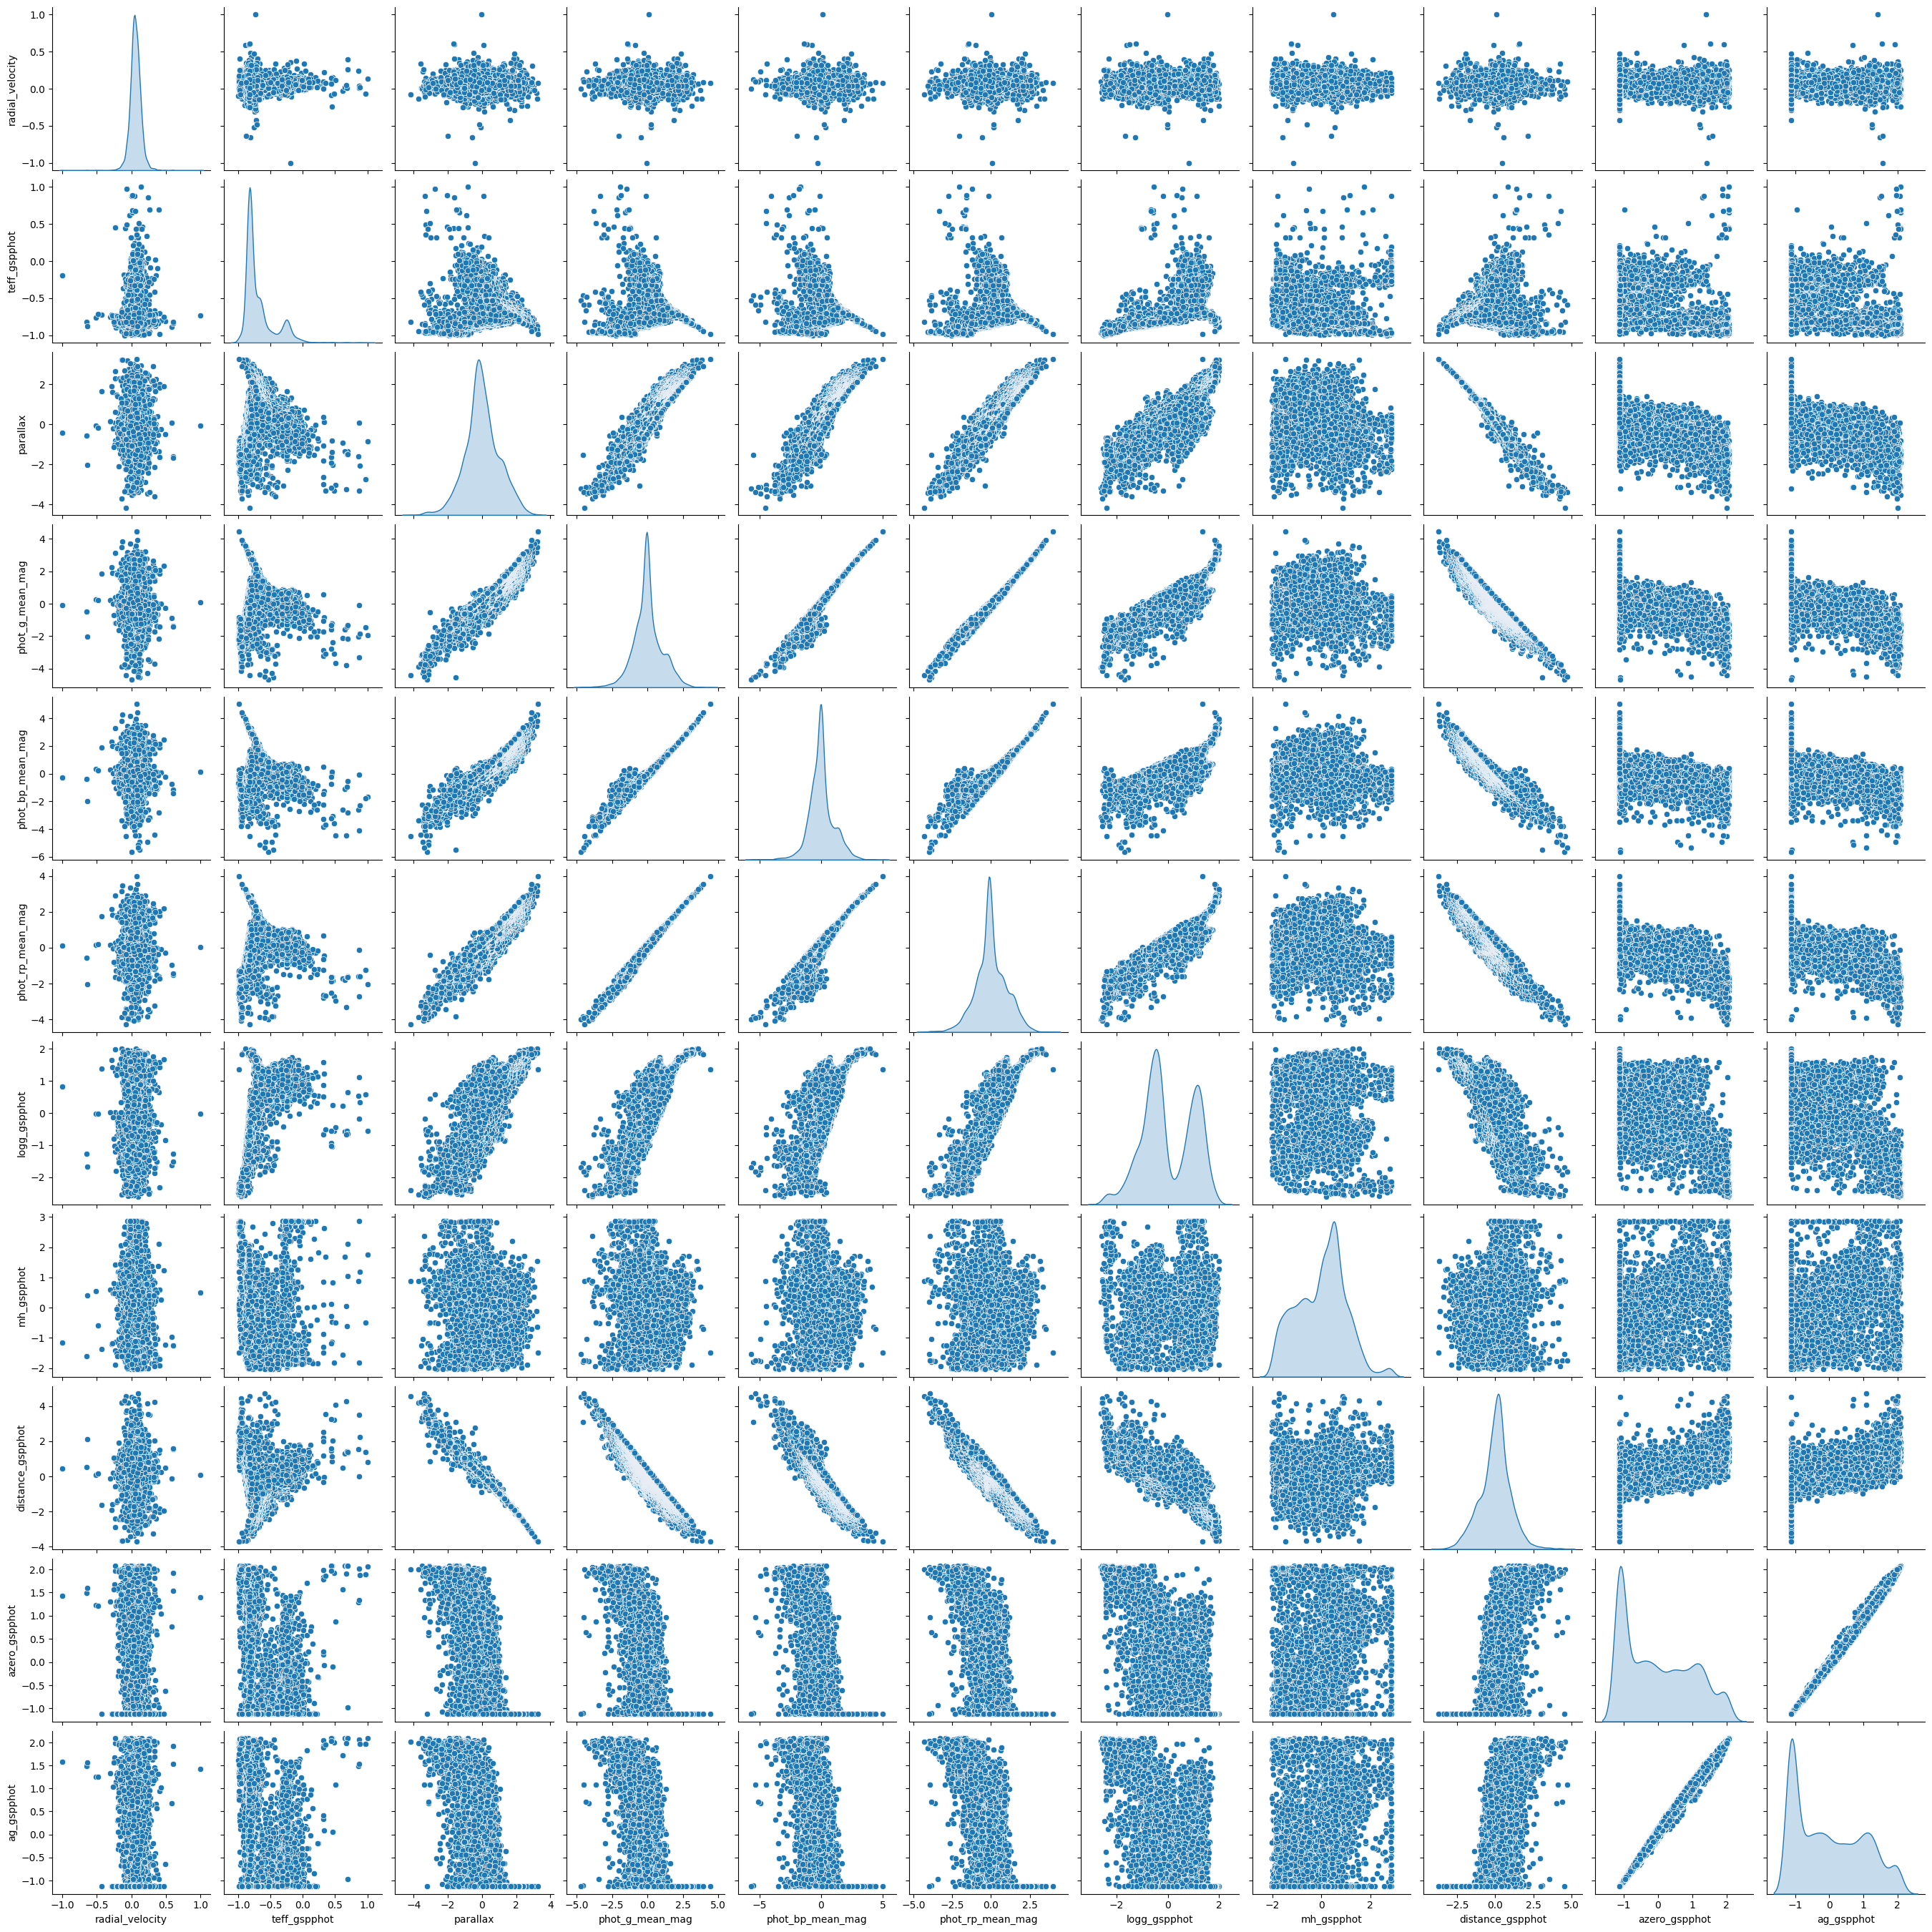

In [9]:
sns.pairplot(star_df_clean_yj_scaled, diag_kind='kde')
plt.savefig('star preprocessed scatterplot matrix')
plt.show()

In [11]:
from scipy.stats import pearsonr

def calculate_corr_and_pvalues(df):
    cols = df.columns
    n = len(cols)
    
    # 빈 데이터프레임 생성
    corr_matrix = pd.DataFrame(index=cols, columns=cols)
    pval_matrix = pd.DataFrame(index=cols, columns=cols)

    for i in range(n):
        for j in range(n):
            x = df[cols[i]]
            y = df[cols[j]]
            r, p = pearsonr(x, y)
            corr_matrix.iloc[i, j] = r
            pval_matrix.iloc[i, j] = p

    return corr_matrix.astype(float), pval_matrix.astype(float)


radial_velocity  teff_gspphot  parallax  phot_g_mean_mag  \
radial_velocity          1.000000      0.040778  0.023633         0.017459   
teff_gspphot             0.040778      1.000000  0.130062         0.112410   
parallax                 0.023633      0.130062  1.000000         0.923106   
phot_g_mean_mag          0.017459      0.112410  0.923106         1.000000   
phot_bp_mean_mag         0.009924     -0.027125  0.896799         0.980939   
phot_rp_mean_mag         0.023945      0.237222  0.921279         0.989884   
logg_gspphot             0.037355      0.625467  0.773898         0.809724   
mh_gspphot              -0.024013     -0.367296 -0.247426        -0.246262   
distance_gspphot        -0.021675     -0.111036 -0.990581        -0.933758   
azero_gspphot           -0.065326     -0.257861 -0.691717        -0.667876   
ag_gspphot              -0.065715     -0.216195 -0.688591        -0.663606   

                  phot_bp_mean_mag  phot_rp_mean_mag  logg_gspphot  \
radial_velocity           0.009924          0.023945      0.037355   
teff_gspphot             -0.027125          0.237222      0.625467   
parallax                  0.896799          0.921279      0.773898   
phot_g_mean_mag           0.980939          0.989884      0.809724   
phot_bp_mean_mag          1.000000          0.946355      0.704321   
phot_rp_mean_mag          0.946355          1.000000      0.879755   
logg_gspphot              0.704321          0.879755      1.000000   
mh_gspphot               -0.177871         -0.299503     -0.355066   
distance_gspphot         -0.911993         -0.927475     -0.765142   
azero_gspphot            -0.590319         -0.710855     -0.663621   
ag_gspphot               -0.592485         -0.701225     -0.636569   

                  mh_gspphot  distance_gspphot  azero_gspphot  ag_gspphot  
radial_velocity    -0.024013         -0.021675      -0.065326   -0.065715  
teff_gspphot       -0.367296         -0.111036      -0.257861   -0.216195  
parallax           -0.247426         -0.990581      -0.691717   -0.688591  
phot_g_mean_mag    -0.246262         -0.933758      -0.667876   -0.663606  
phot_bp_mean_mag   -0.177871         -0.911993      -0.590319   -0.592485  
phot_rp_mean_mag   -0.299503         -0.927475      -0.710855   -0.701225  
logg_gspphot       -0.355066         -0.765142      -0.663621   -0.636569  
mh_gspphot          1.000000          0.242224       0.460249    0.448057  
distance_gspphot    0.242224          1.000000       0.679799    0.677428  
azero_gspphot       0.460249          0.679799       1.000000    0.998506  
ag_gspphot          0.448057          0.677428       0.998506    1.000000

In [15]:
from scipy.stats import pearsonr

def calculate_corr_and_pvalues(df):
    cols = df.columns
    n = len(cols)
    
    corr_matrix = pd.DataFrame(index=cols, columns=cols)
    pval_matrix = pd.DataFrame(index=cols, columns=cols)

    for i in range(n):
        for j in range(n):
            x = df[cols[i]]
            y = df[cols[j]]
            r, p = pearsonr(x, y)
            corr_matrix.iloc[i, j] = round(r, 2)    
            pval_matrix.iloc[i, j] = round(p, 3)    

    return corr_matrix.astype(float), pval_matrix.astype(float)

# 피어슨 상관계수 , p-value
corr_matrix, pval_matrix = calculate_corr_and_pvalues(star_df_clean_yj_scaled)

In [16]:
corr_matrix

radial_velocity  teff_gspphot  parallax  phot_g_mean_mag  \
radial_velocity              1.00          0.04      0.02             0.02   
teff_gspphot                 0.04          1.00      0.13             0.11   
parallax                     0.02          0.13      1.00             0.92   
phot_g_mean_mag              0.02          0.11      0.92             1.00   
phot_bp_mean_mag             0.01         -0.03      0.90             0.98   
phot_rp_mean_mag             0.02          0.24      0.92             0.99   
logg_gspphot                 0.04          0.63      0.77             0.81   
mh_gspphot                  -0.02         -0.37     -0.25            -0.25   
distance_gspphot            -0.02         -0.11     -0.99            -0.93   
azero_gspphot               -0.07         -0.26     -0.69            -0.67   
ag_gspphot                  -0.07         -0.22     -0.69            -0.66   

                  phot_bp_mean_mag  phot_rp_mean_mag  logg_gspphot  \
radial_velocity               0.01              0.02          0.04   
teff_gspphot                 -0.03              0.24          0.63   
parallax                      0.90              0.92          0.77   
phot_g_mean_mag               0.98              0.99          0.81   
phot_bp_mean_mag              1.00              0.95          0.70   
phot_rp_mean_mag              0.95              1.00          0.88   
logg_gspphot                  0.70              0.88          1.00   
mh_gspphot                   -0.18             -0.30         -0.36   
distance_gspphot             -0.91             -0.93         -0.77   
azero_gspphot                -0.59             -0.71         -0.66   
ag_gspphot                   -0.59             -0.70         -0.64   

                  mh_gspphot  distance_gspphot  azero_gspphot  ag_gspphot  
radial_velocity        -0.02             -0.02          -0.07       -0.07  
teff_gspphot           -0.37             -0.11          -0.26       -0.22  
parallax               -0.25             -0.99          -0.69       -0.69  
phot_g_mean_mag        -0.25             -0.93          -0.67       -0.66  
phot_bp_mean_mag       -0.18             -0.91          -0.59       -0.59  
phot_rp_mean_mag       -0.30             -0.93          -0.71       -0.70  
logg_gspphot           -0.36             -0.77          -0.66       -0.64  
mh_gspphot              1.00              0.24           0.46        0.45  
distance_gspphot        0.24              1.00           0.68        0.68  
azero_gspphot           0.46              0.68           1.00        1.00  
ag_gspphot              0.45              0.68           1.00        1.00

In [17]:
pval_matrix

radial_velocity  teff_gspphot  parallax  phot_g_mean_mag  \
radial_velocity             0.000         0.000     0.036            0.122   
teff_gspphot                0.000         0.000     0.000            0.000   
parallax                    0.036         0.000     0.000            0.000   
phot_g_mean_mag             0.122         0.000     0.000            0.000   
phot_bp_mean_mag            0.379         0.016     0.000            0.000   
phot_rp_mean_mag            0.034         0.000     0.000            0.000   
logg_gspphot                0.001         0.000     0.000            0.000   
mh_gspphot                  0.033         0.000     0.000            0.000   
distance_gspphot            0.055         0.000     0.000            0.000   
azero_gspphot               0.000         0.000     0.000            0.000   
ag_gspphot                  0.000         0.000     0.000            0.000   

                  phot_bp_mean_mag  phot_rp_mean_mag  logg_gspphot  \
radial_velocity              0.379             0.034         0.001   
teff_gspphot                 0.016             0.000         0.000   
parallax                     0.000             0.000         0.000   
phot_g_mean_mag              0.000             0.000         0.000   
phot_bp_mean_mag             0.000             0.000         0.000   
phot_rp_mean_mag             0.000             0.000         0.000   
logg_gspphot                 0.000             0.000         0.000   
mh_gspphot                   0.000             0.000         0.000   
distance_gspphot             0.000             0.000         0.000   
azero_gspphot                0.000             0.000         0.000   
ag_gspphot                   0.000             0.000         0.000   

                  mh_gspphot  distance_gspphot  azero_gspphot  ag_gspphot  
radial_velocity        0.033             0.055            0.0         0.0  
teff_gspphot           0.000             0.000            0.0         0.0  
parallax               0.000             0.000            0.0         0.0  
phot_g_mean_mag        0.000             0.000            0.0         0.0  
phot_bp_mean_mag       0.000             0.000            0.0         0.0  
phot_rp_mean_mag       0.000             0.000            0.0         0.0  
logg_gspphot           0.000             0.000            0.0         0.0  
mh_gspphot             0.000             0.000            0.0         0.0  
distance_gspphot       0.000             0.000            0.0         0.0  
azero_gspphot          0.000             0.000            0.0         0.0  
ag_gspphot             0.000             0.000            0.0         0.0